# Data cleaning for sprint and standard race
## Sprint and standard race are divided in male and female
We need to cleanind data:
* divide the category for analysis (the division is for élite and Age Group category)
* clean the outliner

# ⚠️⚠️⚠️
*After the first script, we denote some differences between males and females in terms of time and other things, also the difference in time between sprint and standard distance is obvious. Every file is structured for a specific gender and distance to create the correct division for machine learning elaboration*
# ⚠️⚠️⚠️

This operation is valid for the 4 file (`sprint_female.csv`, `sprint_male.csv`, `standard_male.csv`, `standard_female.csv`),\
but every file are cleaned differently

In this file we analyze: <ins>`sprint_female.csv`</ins>

In [183]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

To open the files use the name of the .csv file that you want to open\
The cleaning operation is the same for all file\
Remember to change the name of the file at the end of the notebook to have the correct file name

In [184]:
data_race = pd.read_csv("sprint_female.csv", low_memory=False)
race = pd.DataFrame(data_race)

In [185]:
race.head()

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5375,1835,4492,female,293,1969,USA,Elite Women,2004-05-09,World Championships,...,14.0,8.0,2.0,2.0,1.0,1.0,1.0,8.0,2004,35
1,5315,1835,4492,female,111,1975,AUS,Elite Women,2004-05-09,World Championships,...,15.0,2.0,4.0,5.0,2.0,10.0,2.0,1.0,2004,29
2,5399,1835,4492,female,293,1975,USA,Elite Women,2004-05-09,World Championships,...,1.0,6.0,1.0,9.0,3.0,3.0,3.0,4.0,2004,29
3,5313,1835,4492,female,170,1978,GER,Elite Women,2004-05-09,World Championships,...,6.0,4.0,15.0,15.0,4.0,7.0,5.0,5.0,2004,26
4,5365,1835,4492,female,247,1985,POR,Elite Women,2004-05-09,World Championships,...,3.0,5.0,5.0,17.0,5.0,5.0,6.0,6.0,2004,19


In [186]:
race.shape

(56236, 61)

Find the unique athlete categories 

In [187]:
category = race["prog_name"].unique()
category

array(['Elite Women', 'U23 Women', 'Junior Women', 'Junior Men',
       'Elite Men', '16-17 Female AG Sprint', '18-19 Female AG',
       '20-24 Female AG', '25-29 Female AG', '40-44 Female AG',
       '50-54 Female AG', '30-34 Female AG', '35-39 Female AG',
       'Youth Women', '16-19 Female AG Sprint', '20-24 Female AG Sprint',
       '25-29 Female AG Sprint', '30-34 Female AG Sprint',
       '35-39 Female AG Sprint', '40-44 Female AG Sprint',
       '45-49 Female AG', '45-49 Female AG Sprint',
       '50-54 Female AG Sprint', '55-59 Female AG',
       '55-59 Female AG Sprint', '60-64 Female AG',
       '60-64 Female AG Sprint', '70-74 Female AG Sprint',
       '65-69 Female AG Sprint', '65-69 Female AG', '70-74 Female AG',
       '75-79 Female AG Sprint', '14-15 Female AG Super Sprint',
       'Semifinal 1 Elite Women', 'Semifinal 2 Elite Women',
       "Women's PT3", "Women's PT4", "Women's PT5",
       '13-15 Female AG Sprint', '18-19 Female AG Sprint', "Women's PT1",
       "Wome

In [188]:
category.shape

(87,)

Take the column with a specific athlete category.\
In this case we take the youth, junior, U23, and élite category

this is the name of the category extracted from the previous array:\
'Elite Women', 'U23 Women', 'Junior Women', 'Junior Men',
'Elite Men', '16-17 Female AG Sprint', '18-19 Female AG',
'20-24 Female AG', '25-29 Female AG', '40-44 Female AG',
'50-54 Female AG', '30-34 Female AG', '35-39 Female AG',
'Youth Women', '16-19 Female AG Sprint', '20-24 Female AG Sprint',
'25-29 Female AG Sprint', '30-34 Female AG Sprint',
'35-39 Female AG Sprint', '40-44 Female AG Sprint',
'45-49 Female AG', '45-49 Female AG Sprint',
'50-54 Female AG Sprint', '55-59 Female AG',
'55-59 Female AG Sprint', '60-64 Female AG',
'60-64 Female AG Sprint', '70-74 Female AG Sprint',
'65-69 Female AG Sprint', '65-69 Female AG', '70-74 Female AG',
'75-79 Female AG Sprint', '14-15 Female AG Super Sprint',
'Semifinal 1 Elite Women', 'Semifinal 2 Elite Women',
"Women's PT3", "Women's PT4", "Women's PT5",
'13-15 Female AG Sprint', '18-19 Female AG Sprint', "Women's PT1",
"Women's PT2", '16-19 Female AG', 'Final Youth Women',
'Semifinal 1 Youth Women', 'Semifinal 2 Youth Women',
'Final B Youth Women', '80-84 Female AG Sprint',
'Semifinal 3 Elite Women', "Men's PT4",
'Elite Women Sprint Distance', "Men's AG", "Women's AG",
'Time Trial Qualifier Junior Women', 'Open Female',
"Women's PT1 OPEN", "Women's PT3 OPEN", "Women's PT5 OPEN",
'Semifinal 3 Youth Women', 'PTWC Women', 'PTS2 Women',
'PTS3 Women', 'PTS5 Women', 'PTVI Women', 'PTS4 Women',
'Final B Elite Women', 'U15 Women', 'U13 Women',
'Time Trial Qualifier Youth Women', '12-13 Female AG Super Sprint',
'Semifinal 1 Junior Women', 'Semifinal 2 Junior Women',
'Semifinal 3 Junior Women', 'Final Junior Women',
'Final B Junior Women', 'U17 Women',
'15-19 Female AG Super Sprint', '20-24 Female AG Super Sprint',
'25-29 Female AG Super Sprint', '30-34 Female AG Super Sprint',
'35-39 Female AG Super Sprint', 'Final Women', 'U21 Women',
'85-89 Female AG Sprint', '40-44 Female AG Super Sprint',
'50-54 Female AG Super Sprint', 'U19 Women'\

To filter only the final result we delete the repecage or semifinal o similar categories

Use only this category

In [189]:
category_name = ['Elite Women', 'U23 Women', 'Junior Women',
                 'Youth Women', 'U15 Women', 'U17 Women']

In [190]:
elite_category = race.loc[race['prog_name'].isin(category_name)]
elite_category
elite_category.value_counts('prog_name')


prog_name
Elite Women     19514
Junior Women    11884
U23 Women        1156
Youth Women       950
U15 Women          64
U17 Women          47
dtype: int64

In [191]:
elite_category.shape

(33615, 61)

create a chart to visualize the result

<function matplotlib.pyplot.show(close=None, block=None)>

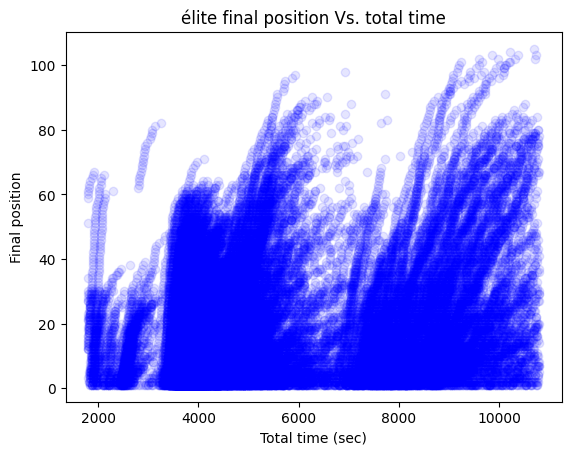

In [192]:
plt.scatter(race["tempo_totale_sec"], race["final_position"], c="blue", alpha=0.1)
plt.title("élite final position Vs. total time")
plt.xlabel("Total time (sec)")
plt.ylabel("Final position")
plt.show

We need to find out if the age is positive and decide the minimum age

In [193]:
age = race[['age_at_race']].value_counts()
age

age_at_race
 18            4589
 19            4387
 17            4230
 16            3181
 20            2478
               ... 
 79               2
 83               2
 85               1
-9                1
 86               1
Length: 96, dtype: int64

The age had an outliner, delete the age below zero

In [194]:
age = race.drop(race.loc[race['age_at_race'] <= 0].index, inplace=True)

create a scatter plot to visualize it

<function matplotlib.pyplot.show(close=None, block=None)>

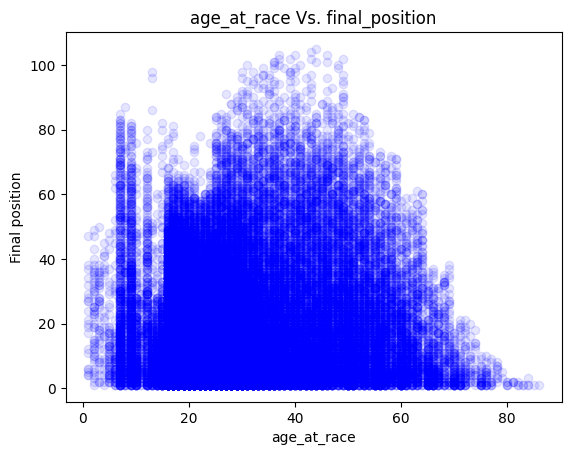

In [195]:
plt.scatter(race["age_at_race"], race["final_position"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. final_position")
plt.xlabel("age_at_race")
plt.ylabel("Final position")
plt.show

We need to decide what is the minimum time for the sprint and standard distance.\
Normally, in an optimal race, the sprint distance it's not below 40 minutes and the standard is 1 hour and 30 minutes.\
Using a scatter plot with age and total time in seconds we know the fonal time of the race.

<function matplotlib.pyplot.show(close=None, block=None)>

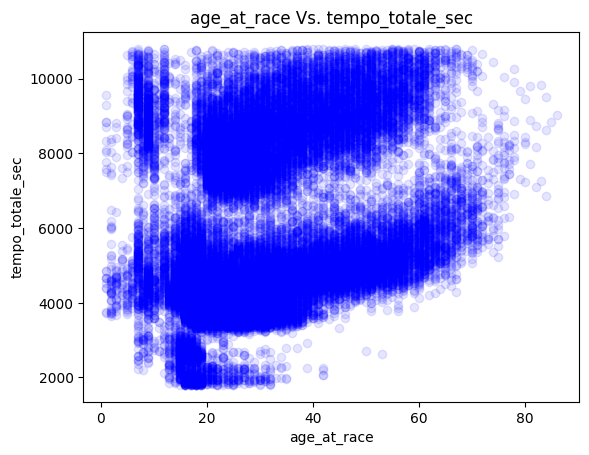

In [196]:
plt.scatter(race["age_at_race"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. tempo_totale_sec")
plt.xlabel("age_at_race")
plt.ylabel("tempo_totale_sec")
plt.show

Find the number of the participants in every category of race\
Visualize the total time in every race category

In [197]:
type_of_race = race["cat_name_categories"].value_counts()
type_of_race

World Championships          15794
Continental Championships    11125
Continental Cup               7623
Race                          7062
Continental Junior Cup        5279
World Cup                     3551
World Championship Series     1493
Age-Group Event               1389
Regional Championships         902
Recognised Games               471
Qualification Event            367
Development Regional Cup       273
Major Games                    196
Recognised Event               193
World Paratriathlon Event      141
World Para Series               52
World Para Cup                  14
Name: cat_name_categories, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

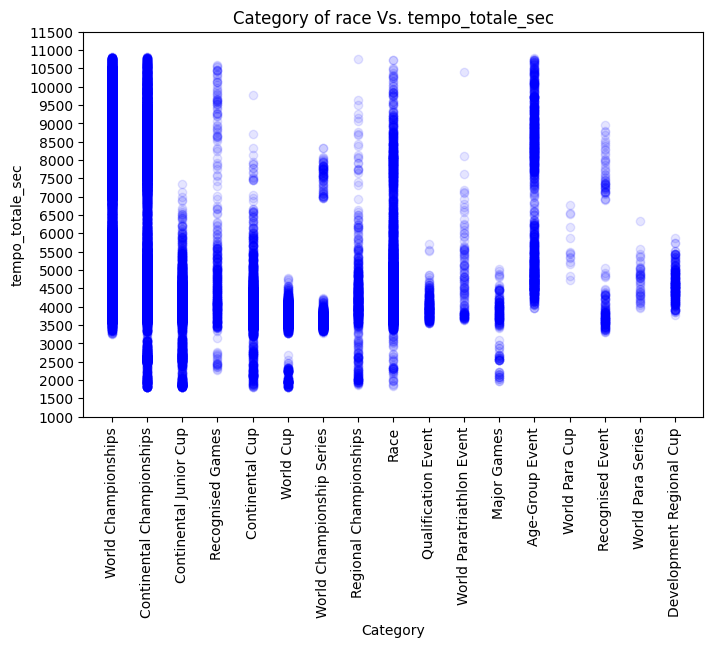

In [198]:
plt.figure(figsize=(8, 5))
plt.scatter(race["cat_name_categories"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Category of race Vs. tempo_totale_sec")
plt.xlabel("Category")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(1000, 12000, 500))
plt.show

We need to delete some type of race that are non included in the élite program


In [199]:
type_of_race = race["cat_name_categories"].unique()
type_of_race

array(['World Championships', 'Continental Championships',
       'Continental Junior Cup', 'Recognised Games', 'Continental Cup',
       'World Cup', 'World Championship Series', 'Regional Championships',
       'Race', 'Qualification Event', 'World Paratriathlon Event',
       'Major Games', 'Age-Group Event', 'World Para Cup',
       'Recognised Event', 'World Para Series',
       'Development Regional Cup'], dtype=object)

From the category name colum delete the race that not included in a élite program like age-group event and paratriathlon race.\
The generic name 'Race' is the national championship, we decide to delete from the analisys\
The list of the category is:

'World Championships', 'Continental Championships',\
'Continental Junior Cup', 'Recognised Games', 'Continental Cup',\
'World Cup', 'World Championship Series', 'Regional Championships',\
'Race', 'Qualification Event', 'World Paratriathlon Event',\
'Major Games', 'Age-Group Event', 'World Para Cup',\
'Recognised Event', 'World Para Series', 'Development Regional Cup'

In [200]:
race_type = ['Race', 'Age-Group Event','World Paratriathlon Event', 
             'Continental Junior Cup', 'World Para Cup', 'World Para Series',
             'Development Regional Cup']
race = race[~race['cat_name_categories'].isin(race_type)]

In [201]:
race["cat_name_categories"].unique()

array(['World Championships', 'Continental Championships',
       'Recognised Games', 'Continental Cup', 'World Cup',
       'World Championship Series', 'Regional Championships',
       'Qualification Event', 'Major Games', 'Recognised Event'],
      dtype=object)

In [202]:
race["cat_name_categories"].value_counts()

World Championships          15794
Continental Championships    11125
Continental Cup               7623
World Cup                     3551
World Championship Series     1493
Regional Championships         902
Recognised Games               471
Qualification Event            367
Major Games                    196
Recognised Event               193
Name: cat_name_categories, dtype: int64

A simple evaluation of the total time\
The minimum value (1799) was found, remember that we deleted the time below 1800 seconds (30 minutes) during the initial cleaning.\
Now we need to decide what is the minimum time to start the analysis for standard and sprint races, for male and female

In [203]:
summmary_time = race[["tempo_totale_sec"]].describe()
summmary_time

,tempo_totale_sec
count,41715.000000
mean,5571.531511
std,2212.058246
min,1801.000000
25%,3852.000000
50%,4594.000000
75%,7605.000000
max,10799.000000


In [204]:
limiti_total_time = race.drop(race.loc[race['tempo_totale_sec'] <= 0].index, inplace=True)

Define better the visualization to decide the lower limit to delete the data\
set the red line to visualize the time. \
Use the variable *time_limit* to change dinamically the value

<function matplotlib.pyplot.show(close=None, block=None)>

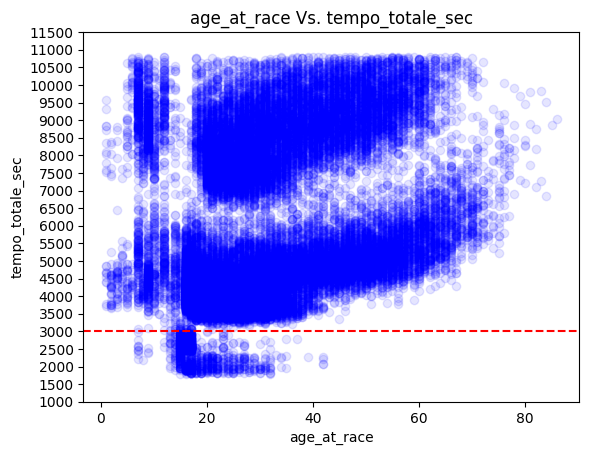

In [205]:
# set a value in second to draw a line on the chart to set the time limit
time_limit = 3000

plt.scatter(race["age_at_race"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. tempo_totale_sec")
plt.xlabel("age_at_race")
plt.ylabel("tempo_totale_sec")
plt.yticks(range(1000, 12000, 500))
plt.axhline(y=time_limit, color='r', linestyle='--')
plt.show

Watching the chart it's important to view the age at race of the athlete.\
Some athletes are over 40 years old.\
Normally the élite athletes don't have age over 40 (in rare cases)\
what is the age limit for the anlisys?

In [206]:
athlete_age = race[["age_at_race"]].describe()
athlete_age

,age_at_race
count,41715.000000
mean,29.559008
std,13.526818
min,1.000000
25%,20.000000
50%,26.000000
75%,37.000000
max,86.000000


Drop the athlete that have a age at race over 40 years old

In [207]:
age_limit = race.drop(race.loc[race['age_at_race'] > 40].index, inplace=True)


In [208]:
athlete_age = race[["age_at_race"]].describe()
athlete_age

,age_at_race
count,33060.000000
mean,23.749849
std,7.186806
min,1.000000
25%,19.000000
50%,23.000000
75%,28.000000
max,40.000000


Create a new chart to visualize the data with an age limit\
During the data cleaning some athletes don't have the years of birth and we decided to set default the year of birth at year 2000. 


<function matplotlib.pyplot.show(close=None, block=None)>

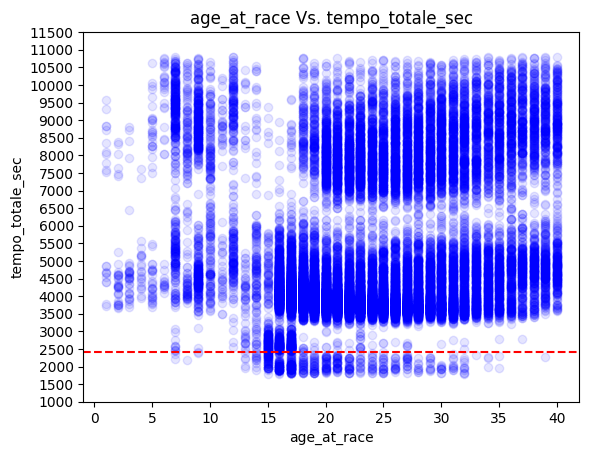

In [209]:
# set a value in second to draw a line on the chart to set the time limit
time_limit_down = 2400

plt.scatter(race["age_at_race"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. tempo_totale_sec")
plt.xlabel("age_at_race")
plt.ylabel("tempo_totale_sec")
plt.yticks(range(1000, 12000, 500))
plt.axhline(y=time_limit_down, color='r', linestyle='--')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

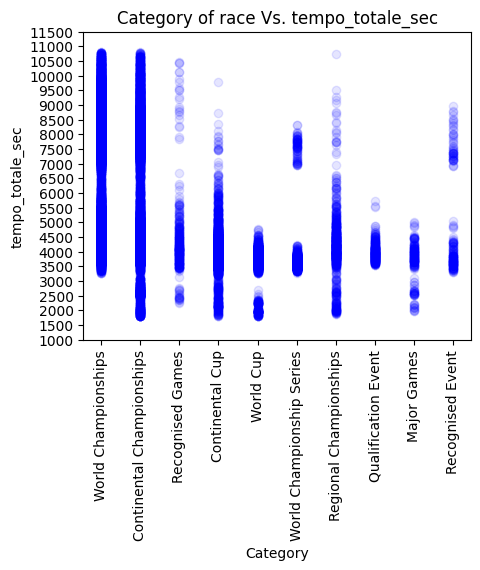

In [210]:
plt.figure(figsize=(5, 4))
plt.scatter(race["cat_name_categories"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Category of race Vs. tempo_totale_sec")
plt.xlabel("Category")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(1000, 12000, 500))
plt.show

In the first chart we can observe the age at race sometime is zero.\
We decide to use all age for the analysis\
In the second chart we can observe all type of race and the total time
<hr/>

Now we need to decide the time limit for the sprint and standard distances\
3000 seconds is 50 minutes\
For a standard distance of half an hour it's a very low time to complete the race.\
Sometimes the race was cut (for example in swim split) because the water temperature was to low for swimming.\
The swim distance from 750 meters is reduced to 400 meters or below\. 
In standard distance we decided to drop all the values below 2400 seconds equal to 40 minutes

In [211]:
drop_time_limit = race.drop(race.loc[race['tempo_totale_sec'] < 2400].index, inplace=True)

Visualize the result of the operation

<function matplotlib.pyplot.show(close=None, block=None)>

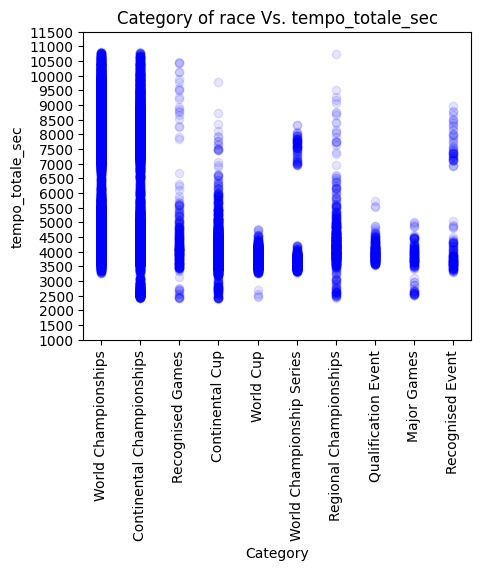

In [212]:
plt.figure(figsize=(5, 4))
plt.scatter(race["cat_name_categories"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Category of race Vs. tempo_totale_sec")
plt.xlabel("Category")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(1000, 12000, 500))
plt.show

For a better understanding of the data, we create a chart with the date and total time\
After the first look at the chart we observe that the total time, sometimes is elevated.\
For a sprint distance time over 5400 seconds (1 hours and 30 minutes) it's a good time for an élite athlete.\
After that we decided to delete all the time over 9000 seconds

<function matplotlib.pyplot.show(close=None, block=None)>

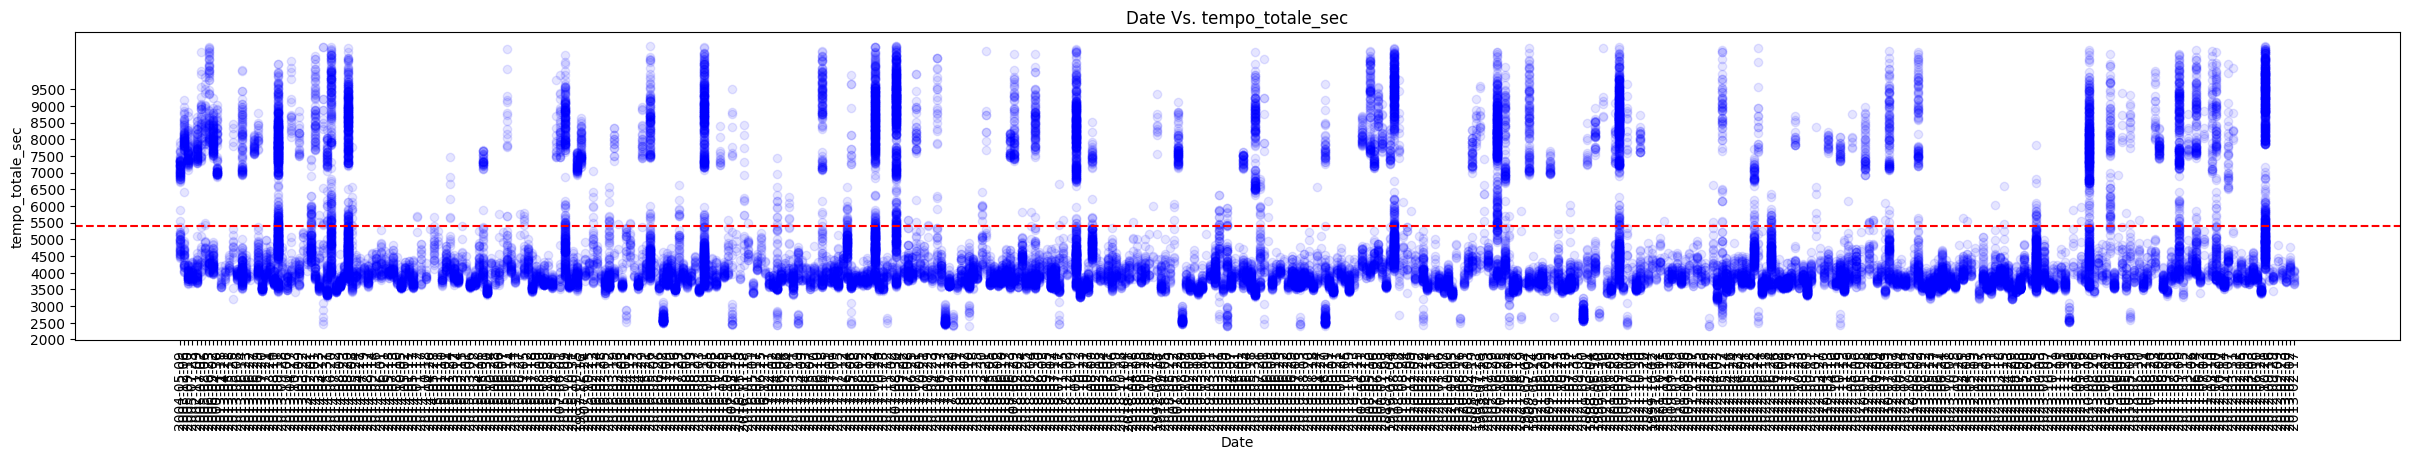

In [213]:
time_limit_up =5400

plt.figure(figsize=(30, 4))
plt.scatter(race["event_date"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Date Vs. tempo_totale_sec")
plt.xlabel("Date")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(2000, 10000, 500))
plt.axhline(y=time_limit_up, color='r', linestyle='--')
plt.show

In [214]:
drop_time_limit_up = race.drop(race.loc[race['tempo_totale_sec'] > 5400].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

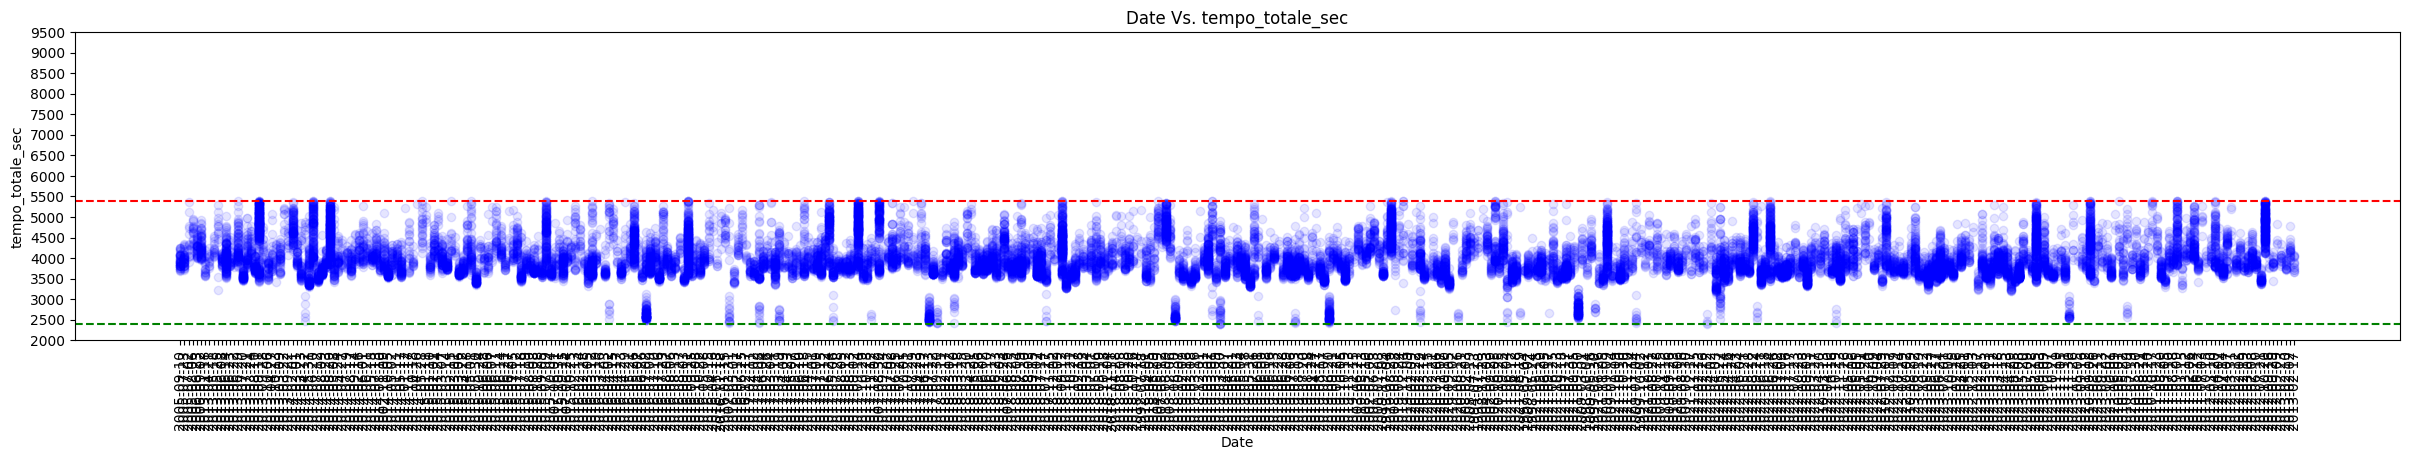

In [215]:
time_limit_up = 5400
time_limit_down = 2400

plt.figure(figsize=(30, 4))
plt.scatter(race["event_date"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Date Vs. tempo_totale_sec")
plt.xlabel("Date")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(2000, 10000, 500))
plt.axhline(y=time_limit_up, color='r', linestyle='--')
plt.axhline(y=time_limit_down, color='g', linestyle='--')
plt.show

For a fine tuning of the limit of the time (below and over) for a standard distance we can re-set the down limit to 5400 second (1 hour and 30 minutes)
<p>Enlarging the chart we denote that the upper time probably is too high for a better machine learning calculus,
still we decided to modify the upper limit while creating the machine learning model and not now
to create a first model and then modify the time limit to try if the time limit creates a different model.<p>

In [216]:
# drop_time_limit_up = race.drop(race.loc[race['tempo_totale_sec'] < 5400].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

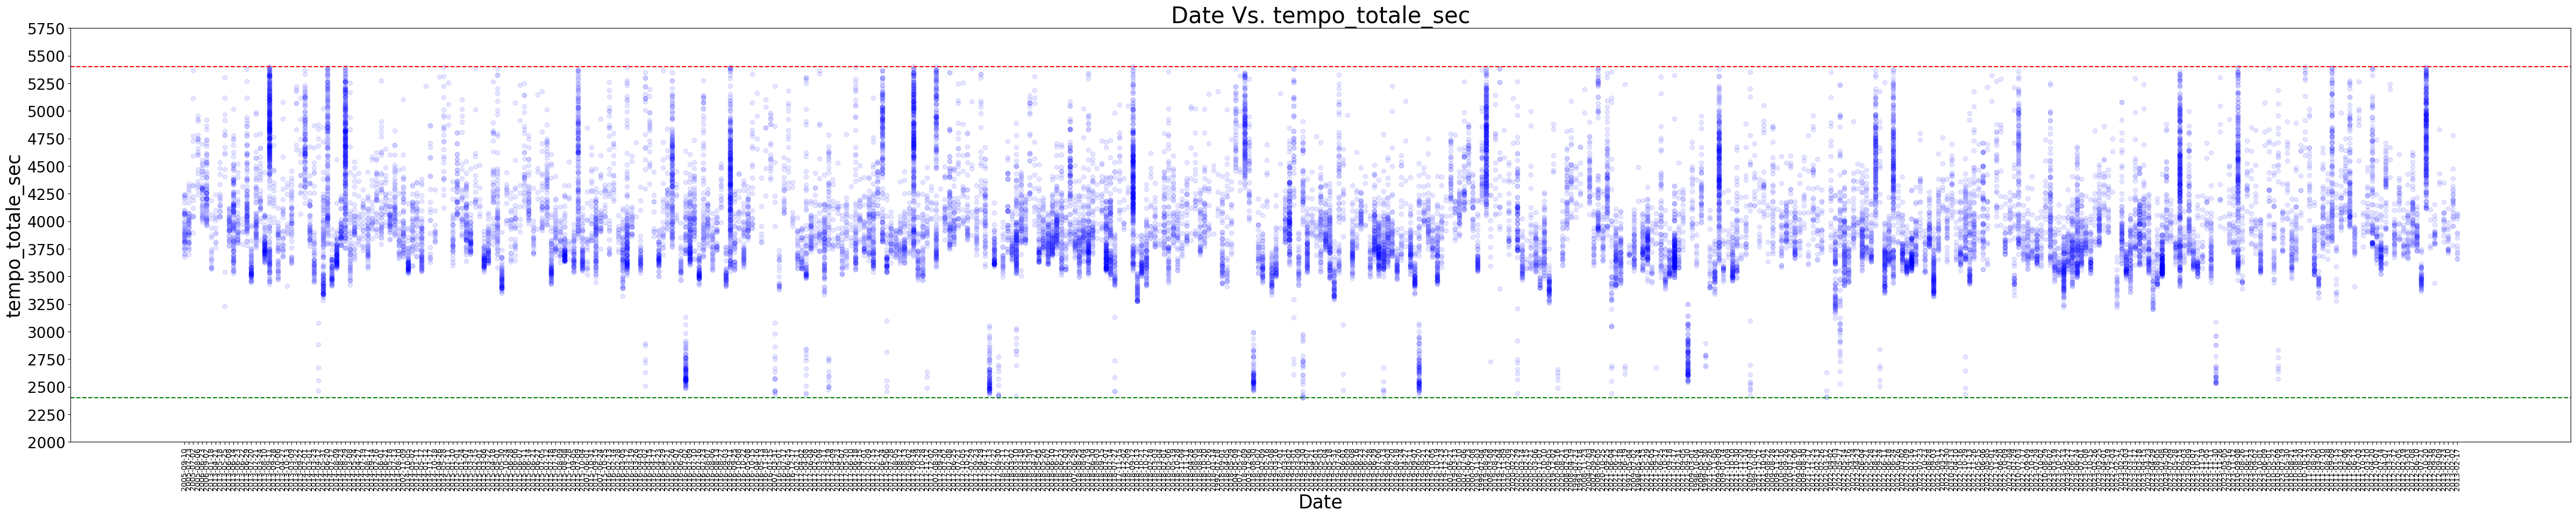

In [217]:
time_limit_up = 5400
time_limit_down = 2400

plt.figure(figsize=(60, 10))
plt.scatter(race["event_date"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Date Vs. tempo_totale_sec", fontsize=30)
plt.xlabel("Date", fontsize=25)
plt.ylabel("tempo_totale_sec", fontsize=25)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(range(2000, 6000, 250), fontsize=20)
plt.axhline(y=time_limit_up, color='r', linestyle='--')
plt.axhline(y=time_limit_down, color='g', linestyle='--')
plt.show

Now we need to create two different files
* Train file: the file used to train the machine learning model
* Test file: the file used to test the machine learning model 
Before create this files we need to know the content of the column (for example the number of the race in every type of race),\
and delete the duplicated column ( like date event) and non numeric column (like type of race)


In [218]:
# counting the number of the race in different type of race for the paper
race_type_count = race["cat_name_categories"].value_counts()
race_type_count

Continental Cup              7388
Continental Championships    4969
World Championships          4133
World Cup                    3386
World Championship Series    1412
Regional Championships        773
Qualification Event           364
Recognised Games              300
Major Games                   179
Recognised Event              142
Name: cat_name_categories, dtype: int64

To know the columns to delete, you can open the file with a text editor\
<b>(do not use excel because transform the data in different format)<b/>

In [219]:
# find the name of the column in the dataset
columns_name = race.columns.tolist()
columns_name

['athlete_id',
 'prog_id',
 'event_id',
 'athlete_gender',
 'athlete_country_id',
 'athlete_yob',
 'athlete_noc',
 'prog_name',
 'prog_date',
 'cat_name_categories',
 'cat_id_categories',
 'cat_parent_id_categories',
 'cat_name_specification_first',
 'cat_id_specification_first',
 'cat_parent_id_specification_first',
 'cat_name_specification_second',
 'cat_id_specification_second',
 'cat_parent_id_specification_second',
 'event_date',
 'event_country_noc',
 'event_region_id',
 'event_country_id',
 'event_region_name',
 'position',
 'start_num',
 'tempo_nuoto_sec',
 'tempo_T1_sec',
 'tempo_ciclismo_sec',
 'tempo_T2_sec',
 'tempo_corsa_sec',
 'tempo_totale_sec',
 'swim_T1',
 'swim_T1_bike',
 'swim_T1_bike_T2',
 'bike_T2',
 'swim_distance',
 'bike_distance',
 'run_distance',
 'percentage_swim',
 'percentage_t_1',
 'percentage_bike',
 'percentage_t_2',
 'percentage_run',
 'swim_T1_percentage',
 'swim_T1_bike_percentage',
 'swim_T1_bike_T2_percentage',
 'bike_T2_percentage',
 'avg_swim_vel_

In [220]:
# find the coulumns type of data in the dataset
columns_name = race.dtypes
columns_name.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('fl

this is the list of the header of the column:\
'athlete_id', 'prog_id', 'event_id', 'athlete_gender', 'athlete_country_id', 'athlete_yob', 'athlete_noc',
 'prog_name', 'prog_date', 'cat_name_categories', 'cat_id_categories', 'cat_parent_id_categories', 'cat_name_specification_first', 'cat_id_specification_first', 'cat_parent_id_specification_first',
 'cat_name_specification_second', 'cat_id_specification_second', 'cat_parent_id_specification_second',
 'event_date', 'event_country_noc', 'event_region_id', 'event_country_id', 'event_region_name',
 'position', 'start_num', 'tempo_nuoto_sec', 'tempo_T1_sec', 'tempo_ciclismo_sec', 'tempo_T2_sec',
 'tempo_corsa_sec', 'tempo_totale_sec', 'swim_T1', 'swim_T1_bike', 'swim_T1_bike_T2', 'bike_T2',
 'swim_distance', 'bike_distance', 'run_distance', 'percentage_swim', 'percentage_t_1', 'percentage_bike',
 'percentage_t_2', 'percentage_run', 'swim_T1_percentage', 'swim_T1_bike_percentage', 'swim_T1_bike_T2_percentage',
 'bike_T2_percentage', 'avg_swim_vel_m/s', 'avg_bike_vel_m/s', 'avg_run_vel_m/s ', 'swim_position', 't1_position',
 'bike_position', 't2_position', 'run_position', 'final_position', 'swim_t1_position', 'swim_t1_bike_position',
 'swim_t1_bike_t2_position', 'prog_date_year', 'age_at_race'

we decided to eliminate these columns and the reason:

* `athlete_id`: it's the ID's of the athlete  it's not important for the analisys
* `prog_id`: the program ID's it's not important for the analisys
*  `event_id`: the event ID's it`s not important for the analisys
* `athlete_gender`: we divided the gender in the previous cleaning
* `athlete_yob`: we used this element in the previous cleaning
* `athlete_noc`: the nationlity of the athlete it's not important for the analisys
* `athlete_country_id`: the ID's of the athlete it's not important for the analisys
* `prog_name`: is the name of the category of the athletes (élite or age-group) we delete all different prog name to have only élite
* `prog_date`: it's a duplicate of the event_date column
* `cat_name_categories`: it's a text and identify the level of the race (i.e. world cup etc.)
* `cat_id_categories`:  it's a number that identify the cat_name_categories
* `cat_parent_id_categories`: it's a code and identify the cat_name_categories. 
* `cat_name_specification_first`:it's a text and identify the type of race of the race (i.e. triathlon, duathlon etc ), we devide the distance (spirint and standard) in the previous cleaning
* `cat_id_specification_first`: it's a code and identify the cat_name_specification_first. 
* `cat_parent_id_specification_first`: it's a code and identify the sub cat_name_specification_first. 
* `cat_name_specification_second`: it's a text and identify the distance of the race (i.e. standard, sprint etc ), we devide the distance (spirint and standard) in the previous cleaning
* `cat_id_specification_second`: it's a code and identify the cat_name_specification_second. 
* `cat_parent_id_specification_second`: it's a code and identify the sub cat_name_specification_second. 
* `event_country_noc`: it's a text and identify the name of the nation 
* `event_region_id`: it's the numeric ID's of the event_country_noc
* `event_country_id`: it's a text to identify the name of the nation of the race
* `event_region_name`: it's the numeric ID's of the event_region_name
* `final_position`: this is a final position calculated, but we have this information from the original data
* `start_num`: it's the starting number of the athlete

In [221]:
surplus_columns = ["athlete_id", "prog_id", "event_id", "athlete_gender", "athlete_yob", "athlete_noc", "athlete_country_id", 
                   "prog_name", "prog_date", "cat_name_categories", "cat_id_categories", "cat_parent_id_categories", 
                   "cat_name_specification_first", "cat_id_specification_first", "cat_parent_id_specification_first",
                   "cat_name_specification_second", "cat_id_specification_second", "cat_parent_id_specification_second",
                   "event_country_noc", "event_region_id", "event_country_id", "event_region_name", "final_position", "start_num"] 

In [222]:
sprint_female = race.drop(surplus_columns, axis=1, inplace=True)
sprint_female

To divide the train test data we need to decide the percentage or the date from - to for the train and the rest for the test.\
The final purpose of the study is to determine (with a good approximation) the total time of the race in the future.\
The date we choose to divide the train/test data is the Olympic event in Tokyo 2021. Before 2021-08-1 it's a train file, after it's a test file.

In [223]:
# find the number of the event before 2021-08-01 and the number of the race after that date
total_number_of_row = len(race)
train_sprint_female = len(race[race['event_date'] < '2021-08-01'])
test_sprint_female = len(race[race['event_date'] > '2021-08-01'])
percentage_train_test = (train_sprint_female / total_number_of_row) * 100
print(f"Total number of row: {total_number_of_row}")
print(f"Total row of train: {train_sprint_female}")
print(f"Total row of test: {test_sprint_female}")
print(f"Percentage of test/train split: {percentage_train_test} %")

Total number of row: 23046
Total row of train: 17709
Total row of test: 5337
Percentage of test/train split: 76.84196823743817 %


The 24% of the test set it's normally too high for the machine learning analisys,\
in tis case we use the end of the 2021 year to set the division.

In [224]:
total_number_of_row = len(race)
train_standard_female = len(race[race['event_date'] < '2021-12-31'])
test_standard_female = len(race[race['event_date'] > '2021-12-31'])
percentage_train_test = (train_standard_female / total_number_of_row) * 100
print(f"Total number of row: {total_number_of_row}")
print(f"Total row of train: {train_standard_female}")
print(f"Total row of test: {test_standard_female}")
print(f"Percentage of test/train split: {percentage_train_test} %")

Total number of row: 23046
Total row of train: 18315
Total row of test: 4731
Percentage of test/train split: 79.47149179901068 %


Using the date of 2021-12-31 the data reach 79% for the the train file and 16% for the test file\
At the end dave the two file in csv format 

In [225]:
train_sprint_female = race[race['event_date'] < '2021-12-31']
test_sprint_female = race[race['event_date'] > '2021-12-31']
train_sprint_female.to_csv('train_sprint_female.csv', index=False)
test_sprint_female.to_csv('test_sprint_female.csv', index=False)